In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
Datadir = "./People"
CATEGORIES = ["Women_Smile","Women_Not_Smile","Man_Not_Smile","Man_Smile"]


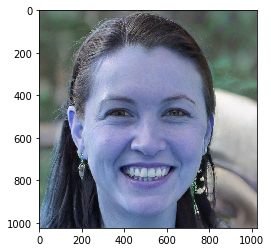

In [3]:
for categories in CATEGORIES:
    path = os.path.join(Datadir,categories)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
        plt.imshow(img_array, cmap = "gray")
        break
    break

In [4]:
img_array.shape

(1024, 1024, 3)

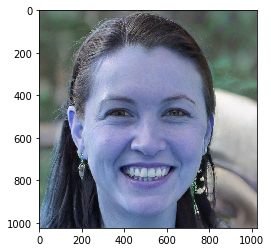

In [5]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array,cmap="gray")
new_array1 = cv2.resize(new_array, (1024,1024))
for categories in CATEGORIES:
    path = os.path.join(Datadir,categories)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
        plt.imshow(img_array, cmap = "gray")
        break
    break

# cv2.imwrite("./dogtest/watch/100.jpg",new_array1)


In [6]:
IMG_SIZE = 100

In [7]:
new_array[0]

array([[ 96, 106,  95],
       [ 93, 105,  95],
       [ 95, 106,  98],
       [ 96, 109, 104],
       [102, 117, 111],
       [106, 122, 115],
       [112, 130, 121],
       [109, 132, 120],
       [110, 134, 121],
       [112, 134, 122],
       [114, 134, 123],
       [110, 133, 120],
       [113, 130, 119],
       [110, 133, 120],
       [108, 132, 121],
       [105, 131, 115],
       [105, 121, 113],
       [102, 115, 106],
       [ 91, 108,  99],
       [ 87, 103,  94],
       [ 91, 102,  92],
       [100, 106, 101],
       [113, 118, 112],
       [117, 118, 112],
       [119, 120, 114],
       [116, 117, 111],
       [107, 113, 103],
       [ 95, 101,  91],
       [ 87,  95,  84],
       [ 85,  89,  86],
       [ 87,  94,  87],
       [ 94,  98,  93],
       [ 94, 100,  94],
       [ 99,  99,  94],
       [100, 102, 101],
       [101, 108, 108],
       [105, 110, 114],
       [109, 119, 123],
       [116, 123, 125],
       [119, 125, 128],
       [119, 123, 124],
       [119, 122

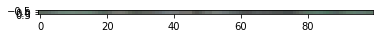

In [8]:
plt.imshow(new_array[0:1],cmap="gray")

In [9]:
training_data = []
def create_training_data():
    for categories in CATEGORIES:
        path = os.path.join(Datadir,categories)
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [10]:
create_training_data()

In [11]:
print(len(training_data))

330


In [18]:
for x in training_data[0:200]:
    print(x[1])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2


In [19]:
X = []
y = []

In [20]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [21]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
ndims = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], ndims)
X_test = X_test.reshape(X_test.shape[0], ndims)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (247, 10000)
Testing Shape: (83, 10000)


In [24]:
print("Training Data Info")
print("Training Data Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)

Training Data Info
Training Data Shape: (247, 10000)
Training Data Labels Shape: (247,)


In [25]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

In [26]:
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
y_train[:20]

array([0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 2, 0])

In [28]:
num_classes = 4
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [41]:
model = Sequential()

In [42]:
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               1000100   
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 404       
Total params: 1,010,604
Trainable params: 1,010,604
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(
    X_train,
    y_train,
    epochs=20,
    shuffle=True,
    verbose=2
)

Train on 247 samples
Epoch 1/20
247/247 - 1s - loss: 2.8126 - accuracy: 0.2874
Epoch 2/20
247/247 - 0s - loss: 1.9006 - accuracy: 0.3603
Epoch 3/20
247/247 - 0s - loss: 1.2335 - accuracy: 0.5223
Epoch 4/20
247/247 - 0s - loss: 1.1462 - accuracy: 0.5344
Epoch 5/20
247/247 - 0s - loss: 1.0883 - accuracy: 0.5830
Epoch 6/20
247/247 - 0s - loss: 1.0454 - accuracy: 0.5587
Epoch 7/20
247/247 - 0s - loss: 0.8891 - accuracy: 0.6356
Epoch 8/20
247/247 - 0s - loss: 0.8401 - accuracy: 0.6599
Epoch 9/20
247/247 - 0s - loss: 0.7815 - accuracy: 0.6923
Epoch 10/20
247/247 - 0s - loss: 0.7495 - accuracy: 0.7166
Epoch 11/20
247/247 - 0s - loss: 0.7903 - accuracy: 0.6721
Epoch 12/20
247/247 - 0s - loss: 0.7051 - accuracy: 0.7328
Epoch 13/20
247/247 - 0s - loss: 0.7001 - accuracy: 0.7490
Epoch 14/20
247/247 - 0s - loss: 0.6616 - accuracy: 0.7490
Epoch 15/20
247/247 - 0s - loss: 0.6042 - accuracy: 0.7733
Epoch 16/20
247/247 - 0s - loss: 0.5899 - accuracy: 0.7854
Epoch 17/20
247/247 - 0s - loss: 0.5660 - ac

In [45]:
model.save("Training_male_female.h5")

In [47]:
X_train[0]

array([0.3715415 , 0.37401575, 0.39370079, ..., 0.84920635, 0.89285714,
       0.9123506 ])